In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector 
from qiskit.tools.visualization import plot_histogram

In [2]:
def swap(qc, qubit_1, qubit_2, qubit_3,crx,crz):
    qc.cx(qubit_1,qubit_2)
    qc.h(qubit_1)
    qc.measure(qubit_2,crz)
    qc.measure(qubit_1,crx)
    qc.x(qubit_3).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit_3).c_if(crz, 1) # are in the state '1'
    Circuit.barrier()

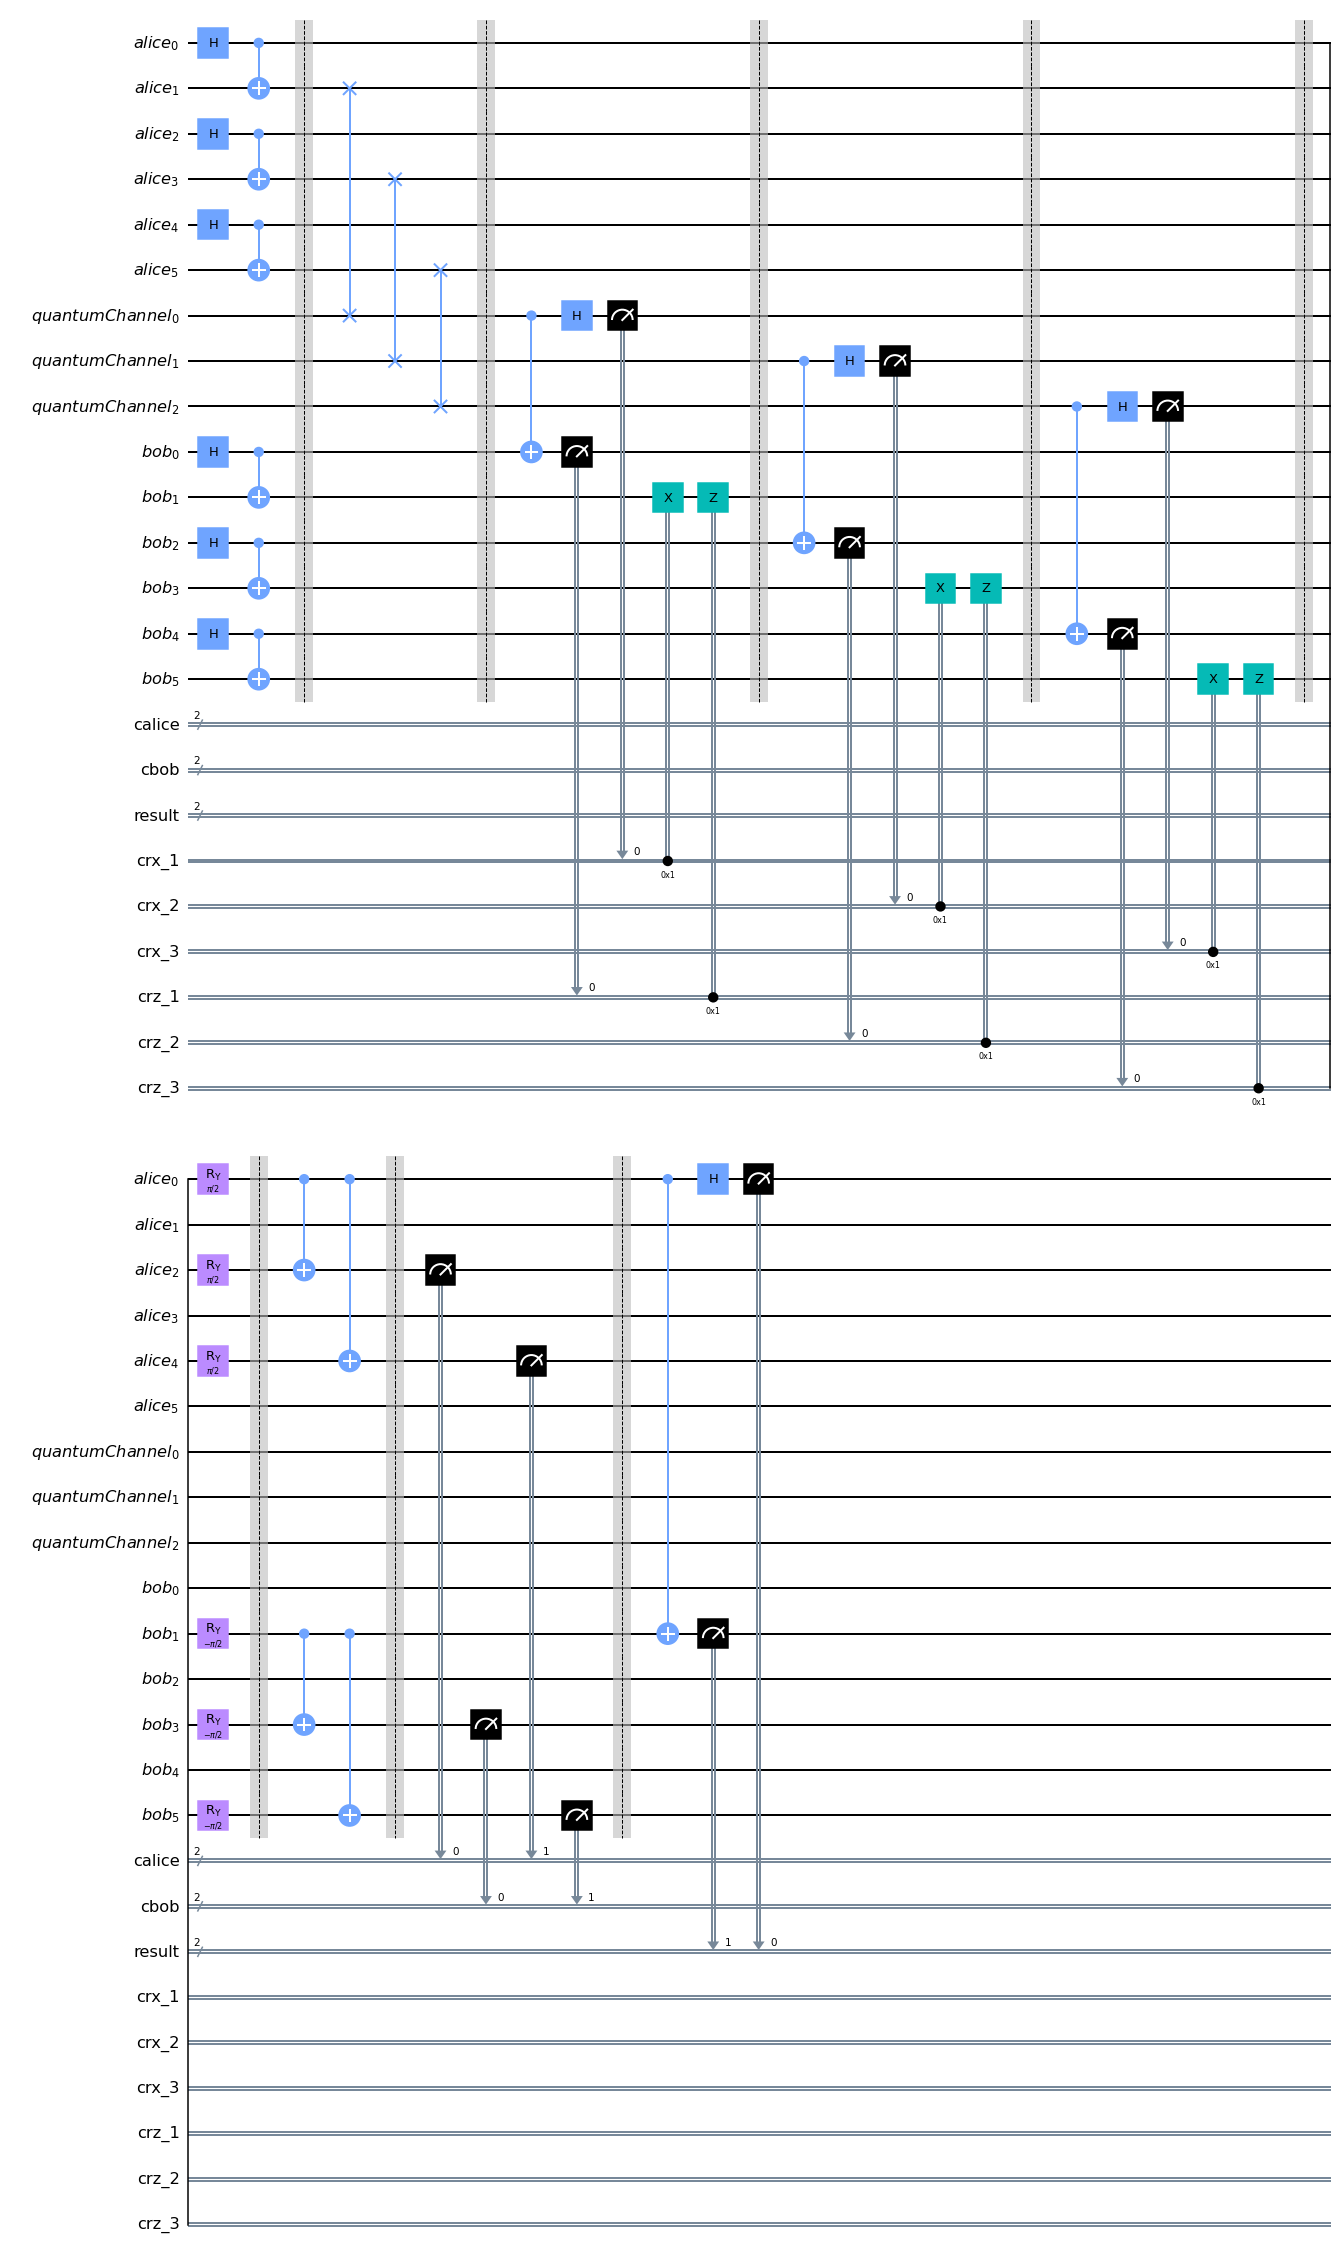

In [3]:
A = QuantumRegister(6, 'alice')
C = QuantumRegister(3, 'quantumChannel')
B = QuantumRegister(6, 'bob')
ca = ClassicalRegister(2, 'calice')
cb = ClassicalRegister(2, 'cbob')
cc = ClassicalRegister(2, 'result')
crz_1, crx_1 = ClassicalRegister(1, name="crz_1"), ClassicalRegister(1, name="crx_1")
crz_2, crx_2 = ClassicalRegister(1, name="crz_2"), ClassicalRegister(1, name="crx_2")
crz_3, crx_3 = ClassicalRegister(1, name="crz_3"), ClassicalRegister(1, name="crx_3")
Circuit = QuantumCircuit(A, C, B, ca,cb,cc,crx_1,crx_2,crx_3,crz_1,crz_2,crz_3)
#Entanglement 
#H
#Alice
Circuit.h(A[0])
Circuit.h(A[2])
Circuit.h(A[4])
#Bob
Circuit.h(B[0])
Circuit.h(B[2])
Circuit.h(B[4])
#CNOT
#Alice
Circuit.cx(A[0],A[1])
Circuit.cx(A[2],A[3])
Circuit.cx(A[4],A[5])
#Bob
Circuit.cx(B[0],B[1])
Circuit.cx(B[2],B[3])
Circuit.cx(B[4],B[5])
Circuit.barrier()
#####################################################################
Circuit.swap(A[1],C[0])
Circuit.swap(A[3],C[1])
Circuit.swap(A[5],C[2])
Circuit.barrier()
#####################################################################
swap(Circuit,C[0],B[0],B[1],crx_1,crz_1)
swap(Circuit,C[1],B[2],B[3],crx_2,crz_2)
swap(Circuit,C[2],B[4],B[5],crx_3,crz_3)
#####################################################################
from math import pi
#Alice
Circuit.ry(pi/2,A[0])
Circuit.ry(pi/2,A[2])
Circuit.ry(pi/2,A[4])
#Bob
Circuit.ry(-pi/2,B[1])
Circuit.ry(-pi/2,B[3])
Circuit.ry(-pi/2,B[5])
Circuit.barrier()
#####################################################################
#Alice
Circuit.cx(A[0],A[2])
Circuit.cx(A[0],A[4])
#Bob
Circuit.cx(B[1],B[3])
Circuit.cx(B[1],B[5])
Circuit.barrier()
#####################################################################
Circuit.measure(A[2],ca[0])
Circuit.measure(B[3],cb[0])
Circuit.measure(A[4],ca[1])
Circuit.measure(B[5],cb[1])
Circuit.barrier()
#####################################################################
Circuit.cx(A[0],B[1])
Circuit.h(A[0])
Circuit.measure(B[1],cc[1])
Circuit.measure(A[0],cc[0])
Circuit.draw(output='mpl')